In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [85]:
n_nodes = 20
n_dofs = n_nodes*2
n_elements = n_nodes-1
x = np.linspace(0, 1, n_nodes)

In [86]:
#Element stiffnes matrix
k = np.matrix([[12, 6, -12, 6], [6, 4, -6, 2], [-12, -6, 12, -6], [6, 2, -6, 4]])*10/12

#Element mass matrix
m = np.matrix([[156, 22, 54, -13],[22, 4, 13, -3], [54, 13, 156, -22], [-13, -3, -22, 4]] )*1/420

In [87]:
#Global stiffness matrix
n_dofs = n_nodes*2
K = np.zeros([n_dofs, n_dofs])
for i in range(n_elements):
    K[2*i:2*i+4,2*i:2*i+4] += k
    
#Global mass matrix
M = np.zeros([n_dofs, n_dofs])
for i in range(n_elements):
    M[2*i:2*i+4,2*i:2*i+4] += m
    

In [88]:
#Force vector
F = np.zeros(n_dofs) #Free vibration

In [89]:
#Initial conditions
dz0 = x*(1-x)
dzt0 = np.zeros(n_nodes)

d0 = np.zeros(n_dofs)
dt0 = np.zeros(n_dofs)
d0[0:-1:2] = dz0

In [90]:
#Account for homogenous BC
F = F[2:-2]
K = K[2:-2,2:-2]
M = M[2:-2,2:-2]

In [91]:
from numpy.linalg import inv

In [92]:
Minv = inv(M)

In [93]:
d_i = d0[2:-2]

In [94]:
dt_i = -np.matmul(Minv, np.matmul(K,d_i)-F)

In [95]:
dt_i

array([  2.93913801,  51.82436507,   0.32806232,  73.69193241,
        -0.4621893 ,  71.77662456,  -0.6868141 ,  62.89908944,
        -0.75046257,  52.04581665,  -0.7684941 ,  40.6327612 ,
        -0.77360014,  29.06113602,  -0.77503814,  17.44466234,
        -0.77541526,   5.81574897,  -0.77541526,  -5.81574897,
        -0.77503814, -17.44466234,  -0.77360014, -29.06113602,
        -0.7684941 , -40.6327612 ,  -0.75046257, -52.04581665,
        -0.6868141 , -62.89908944,  -0.4621893 , -71.77662456,
         0.32806232, -73.69193241,   2.93913801, -51.82436507])

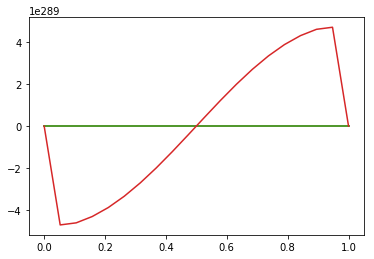

In [96]:
#Timestepping Explicit Euler
d_i = d0[2:-2]

n_timesteps = 100000
D = np.zeros([n_nodes, n_timesteps])
D[:,0] = dz0

dt = 1/1000
for i in range(n_timesteps):
    
    dt_i = -np.matmul(Minv, np.matmul(K,d_i)-F)
    d_i = d_i + dt_i*dt
    
    dz = d_i[0:-1:2]
    dz = np.insert(dz,0,0)
    dz = np.append(dz,0)
    
    if i%1000 == 0:
        plt.plot(x, dz)
    
    D[:, i] = dz
    

plt.show()

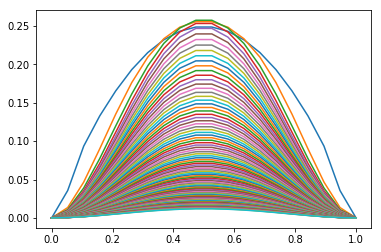

In [98]:
#Timestepping Theta Scheme
Theta = 1/2
d_i = d0[2:-2]

n_timesteps = 10000
D = np.zeros([n_nodes, n_timesteps])
D[:,0] = dz0

dt = 1/10

Q = inv(M + Theta*dt*K)
P = (M + (Theta - 1)*dt*K)

for i in range(n_timesteps):
    
    #dt_i = -np.matmul(Minv, np.matmul(K,d_i)-F)
    d_i = np.matmul(Q, np.matmul(P,d_i))
    
    dz = d_i[0:-1:2]
    dz = np.insert(dz,0,0)
    dz = np.append(dz,0)
    
    if i%100 == 0:
        plt.plot(x, dz)
    
    D[:, i] = dz
    
plt.show()

In [49]:
d_i

array([[ 0.06806908,  0.        ,  0.16791392,  0.        ,  0.22222222,
         0.        ,  0.24691358,  0.        ,  0.24691358,  0.        ,
         0.22222222,  0.        ,  0.17283951,  0.        ,  0.09876543,
         0.        ],
       [ 0.09876543,  0.        ,  0.14969314,  0.        ,  0.22222222,
         0.        ,  0.24691358,  0.        ,  0.24691358,  0.        ,
         0.22222222,  0.        ,  0.17283951,  0.        ,  0.09876543,
         0.        ],
       [ 0.09595081,  0.        ,  0.11452529,  0.        ,  0.21679596,
         0.        ,  0.24691358,  0.        ,  0.24691358,  0.        ,
         0.22222222,  0.        ,  0.17283951,  0.        ,  0.09876543,
         0.        ],
       [ 0.07997725,  0.        ,  0.17283951,  0.        ,  0.18658556,
         0.        ,  0.24691358,  0.        ,  0.24691358,  0.        ,
         0.22222222,  0.        ,  0.17283951,  0.        ,  0.09876543,
         0.        ],
       [ 0.09876543,  0.        ,  0